In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]
  
  return pos_encoding



In [17]:
# Create a 16x16 Positional Encoding
tokens = 16
dimensions = 16 # Set Dimensions
pos_encoding = positional_encoding(tokens, dimensions)

In [18]:
# Check for orthogonality
A_pos = pos_encoding[0]
orthogonal = np.dot(A_pos.T, A_pos) # The dot product test did not produce an identity matrix therefore it is not orthogonal

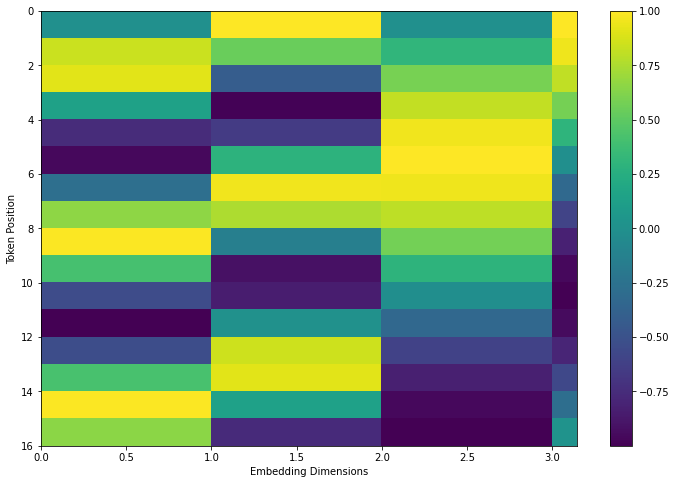

In [19]:
# Plot
plt.figure(figsize=(12,8))
plt.pcolormesh(A_pos, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, np.pi))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

In [20]:
def gram_schmidt(A):
    """Orthogonalize a set of vectors stored as the columns of matrix A."""
    # Get the number of vectors (This will be the # of columns(n)).
    m, n = A.shape
    Q =  A.astype(np.float64)
    for j in range(n):
      # To orthogonalize the vector in column j with respect to the
      # previous vectors, subtract from it its projection onto
      # each of the previous vectors.
      for i, k in enumerate(range(j)):
        Q[:, j] -= np.dot(Q[:, k], Q[:, j]) * Q[:, k]
      Q[:, j] = Q[:, j]/np.linalg.norm(Q[:, j])
    return Q

In [21]:
Q = gram_schmidt(A_pos)
W = np.matmul(Q.T, Q) # Sanity check, the resulting matrix is not perfectly orthonormal due to round-off errors

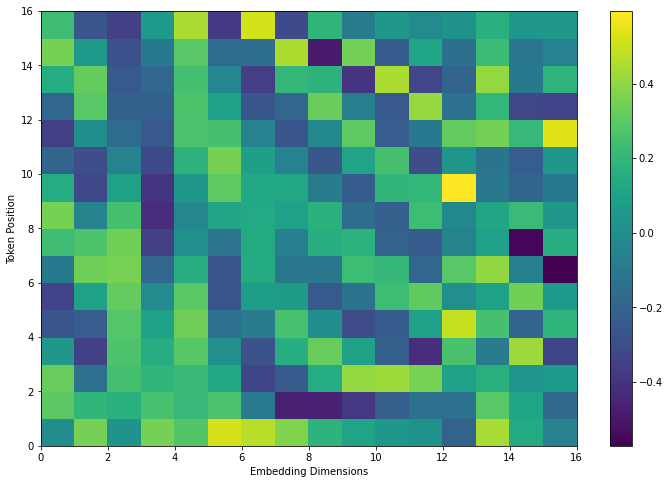

In [22]:
plt.figure(figsize=(12,8))
plt.pcolormesh(Q, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, 16))
plt.ylim((0, 16))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()